In [3]:
from matplotlib.pyplot import hist, show
from collections import Counter
import urllib
import codecs
from nltk.stem import WordNetLemmatizer

## Czytania danego dnia

In [4]:
#downloading the webpage
import requests
import datetime

now = datetime.datetime.now()
year = str(now.year)
month = str(now.month)
if len(month) == 1:
    month = "0" + month
day = str(now.day)
ymd = year+month+day

    
address = "http://mateusz.pl/czytania/" + year + "/" + ymd + ".html"
#address = "http://mateusz.pl/czytania/2018/20180909.html" #niedziela
page = requests.get(address)

In [5]:
#parsing a page
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [6]:
#print(soup.prettify()) 
#Exception handling for more readings
try:
    section = list(soup.children)[9]
    section_content = section.find_all('p')
except:
    section = soup.find_all('section')[0]
    section_content =section.find_all('p')

In [7]:
len(section_content)

7

In [8]:
pierwsze_czytanie = section_content[0]
pierwsze_czytanie

<p>(Mdr 4, 7-15)<br/>
   Sprawiedliwy, choćby umarł przedwcześnie, znajdzie odpoczynek. Starość jest czcigodna nie przez długowieczność i liczbą lat się jej nie mierzy: sędziwością u ludzi jest mądrość, a miarą starości życie nieskalane. Ponieważ spodobał się Bogu, znalazł Jego miłość, i żyjąc wśród grzeszników, został przeniesiony. Zabrany został, by złość nie odmieniła jego myśli albo ułuda nie uwiodła duszy: bo urok marności przesłania dobro, a burza namiętności mąci prawy umysł. Wcześnie osiągnąwszy doskonałość, przeżył czasów wiele. Dusza jego podobała się Bogu, dlatego pospiesznie wyszedł spośród nieprawości. A ludzie patrzyli i nie pojmowali, ani sobie tego nie wzięli do serca, że łaska i miłosierdzie nad Jego wybranymi i nad świętymi Jego opatrzność.</p>

In [9]:
ewangelia = section_content[len(section_content)-1]
ewangelia

<p>(Łk 2, 41-52)<br/>
		Rodzice Jezusa chodzili co roku do Jerozolimy na Święto Paschy. Gdy miał On lat dwanaście, udali się tam zwyczajem świątecznym. Kiedy wracali po skończonych uroczystościach, został Jezus w Jerozolimie, a tego nie zauważyli Jego Rodzice. Przypuszczając, że jest w towarzystwie pątników, uszli dzień drogi i szukali Go wśród krewnych i znajomych. Gdy Go nie znaleźli, wrócili do Jerozolimy szukając Go. Dopiero po trzech dniach odnaleźli Go w świątyni, gdzie siedział między nauczycielami, przysłuchiwał się im i zadawał pytania. Wszyscy zaś, którzy Go słuchali, byli zdumieni bystrością Jego umysłu i odpowiedziami. Na ten widok zdziwili się bardzo, a Jego Matka rzekła do Niego: "Synu, czemuś nam to uczynił? Oto ojciec Twój i ja z bólem serca szukaliśmy Ciebie". Lecz On im odpowiedział: "Czemuście Mnie szukali? Czy nie wiedzieliście, że powinienem być w tym, co należy do mego Ojca?" Oni jednak nie zrozumieli tego, co im powiedział. Potem poszedł z nimi i wrócił do Nazare

## Noise removal

In [10]:
import re
text = str(ewangelia)

def clean_html(raw):
    cleaner = re.compile('<.*?>')
    cleantext = re.sub(cleaner, '', raw)
    return cleantext

def clean_proverbs (raw):
    cleaner = re.compile('\([^)]*\)')
    cleantext = re.sub(cleaner, '',raw)
    return cleantext

def clean_indent(raw):
    cleaner = re.compile('^\s+')
    cleantext = re.sub(cleaner, '',raw)
    return cleantext

def clean_text(raw):
    text = clean_html(raw)
    text = clean_proverbs(text)
    text = clean_indent(text)
    return text

In [11]:
clean_text = clean_text(text)
clean_text

'Rodzice Jezusa chodzili co roku do Jerozolimy na Święto Paschy. Gdy miał On lat dwanaście, udali się tam zwyczajem świątecznym. Kiedy wracali po skończonych uroczystościach, został Jezus w Jerozolimie, a tego nie zauważyli Jego Rodzice. Przypuszczając, że jest w towarzystwie pątników, uszli dzień drogi i szukali Go wśród krewnych i znajomych. Gdy Go nie znaleźli, wrócili do Jerozolimy szukając Go. Dopiero po trzech dniach odnaleźli Go w świątyni, gdzie siedział między nauczycielami, przysłuchiwał się im i zadawał pytania. Wszyscy zaś, którzy Go słuchali, byli zdumieni bystrością Jego umysłu i odpowiedziami. Na ten widok zdziwili się bardzo, a Jego Matka rzekła do Niego: "Synu, czemuś nam to uczynił? Oto ojciec Twój i ja z bólem serca szukaliśmy Ciebie". Lecz On im odpowiedział: "Czemuście Mnie szukali? Czy nie wiedzieliście, że powinienem być w tym, co należy do mego Ojca?" Oni jednak nie zrozumieli tego, co im powiedział. Potem poszedł z nimi i wrócił do Nazaretu; i był im poddany. A

## Tokenization & Segmentation

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
text = clean_text

In [13]:
sentences = sent_tokenize(text)
#sentences

In [14]:
tokens = word_tokenize(text)
lower_tokens = [t.lower() for t in tokens]
#lower_tokens

## Normalization

#### Lemmatyzacja (lemmatisation) 
Algorytm znajdowania lemmy, formy podstawowej wyrazu w obszarze części mowy którą reprezentuje. Inaczej: wyszukiwanie formy kanonicznej leksemu. W komputerowej analizie języka naturalnego lemmatyzacja jest operacją bardziej precyzyjną niż stemmatyzacja. 

#### Stemmatyzacja (stemming) 
Sprowadzenie wyrazu reprezentującego dowolną część mowy do stemu, rdzenia postaci źródłowej, najczęściej rzeczownika, bądź niekiedy nawet sekwencji znaków nie mającej samodzielnego znaczenia w języku naturalnym. 

In [15]:
# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]
#alpha_only

In [52]:
polish_stops = codecs.open("polishStopWords",'r','utf-8')
ps = polish_stops.read().split('\n')
polish_stops.close()

In [53]:
# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in ps]
#no_stops

## Topic identification
To do:
- tf-idf
- Named-entity recognition

### Bag of words

In [54]:
bow = Counter(no_stops)

In [55]:
bow.most_common(10)

[('rodzice', 2),
 ('jerozolimy', 2),
 ('jezus', 2),
 ('szukali', 2),
 ('matka', 2),
 ('jezusa', 1),
 ('chodzili', 1),
 ('święto', 1),
 ('paschy', 1),
 ('miał', 1)]

### Word cloud

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

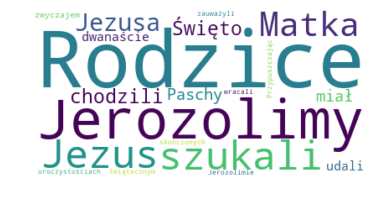

In [56]:
text = clean_text

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = ps, max_font_size=500, max_words=20, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Classification ?

### Other stuff

In [18]:
milujcie_sent = milujcie.read().split('\r\n')

NameError: name 'milujcie' is not defined

In [ ]:
song = ""
for sentence in milujcie_sent:
    song = song + sentence

In [ ]:
text = milosc.read()
#text = song

In [ ]:
milujcie = codecs.open("milujcie",'r','utf-8')